In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
import numpy as np
import cv2
from tqdm import tqdm


In [4]:
train_dir="/content/drive/MyDrive/Colab Notebooks/dataset/train"
test_dir="/content/drive/MyDrive/Colab Notebooks/dataset/test"
categories = ["angry","disgust","fear","happy","neutral","sad","surprise"]


training = []
testing = []

In [5]:
def train_data ():
    for category in categories:
        path=os.path.join(train_dir, category)
        label =categories.index(category)
        for img in tqdm(os.listdir(path)):
            try:
                shape_img=cv2.imread(os.path.join(path, img))
                shape_img=cv2.resize(shape_img,(32,32))
                training.append([shape_img,label])
                    
            except Exception as e :
                pass
            
            
def test_data ():
    for category in categories:
        path=os.path.join(test_dir, category)
        label =categories.index(category)
        for img in tqdm(os.listdir(path)):
            try:
                shape_img=cv2.imread(os.path.join(path, img))
                shape_img=cv2.resize(shape_img,(32,32))
                testing.append([shape_img,label])
                    
            except Exception as e :
                pass        
    
    
    

train_data ()
test_data()

Train_features=[]
Train_lables=[]
Test_features=[]
Test_lables=[]

for feature ,label in training:
    Train_features.append(feature)
    Train_lables.append(label)



for feature ,label in testing :
    Test_features.append(feature)
    Test_lables.append(label)



Train_features=np.array(Train_features)
Train_lables = np.array(Train_lables)
Test_features=np.array(Test_features)
Test_lables = np.array(Test_lables)

100%|██████████| 831/831 [00:08<00:00, 97.81it/s] 


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,MaxPooling2D,Conv2D,Dropout,Activation,BatchNormalization
from tensorflow.keras.preprocessing import image
import tensorflow as tf
import keras


In [14]:
model=Sequential() 

model.add(Conv2D(50,(5,5),activation='relu',input_shape=(32,32,3)))#feature extraction
model.add(BatchNormalization())
model.add(Conv2D(50,(5,5),activation='relu'))#feature extraction
model.add(MaxPooling2D(pool_size=(2, 2)))#minimize image
model.add(Dropout(0.25)) # for regulization
model.add(Flatten())
model.add(Dense(128,activation='relu')) # feature selection
model.add(Dense(7,activation='softmax'))# for predict the label

model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])


# overview of deep neural network
model.summary()

history = model.fit(Train_features , Train_lables, epochs=70,batch_size= 10 , validation_data=(Test_features, Test_lables))
test_loss, test_acc = model.evaluate(Test_features,  Test_lables, verbose=2)
print("accuracy ", test_acc)


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 28, 28, 50)        3800      
                                                                 
 batch_normalization_9 (Batc  (None, 28, 28, 50)       200       
 hNormalization)                                                 
                                                                 
 conv2d_16 (Conv2D)          (None, 24, 24, 50)        62550     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 12, 12, 50)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 12, 12, 50)        0         
                                                                 
 flatten_1 (Flatten)         (None, 7200)             

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1906/1906 [==============================] - 181s 95ms/step - loss: 1.5436 - accuracy: 0.4247 - val_loss: 1.7105 - val_accuracy: 0.3206
Epoch 2/70
1906/1906 [==============================] - 180s 94ms/step - loss: 1.3894 - accuracy: 0.4835 - val_loss: 1.7042 - val_accuracy: 0.3468
Epoch 3/70
1906/1906 [==============================] - 180s 94ms/step - loss: 1.3143 - accuracy: 0.5155 - val_loss: 1.6989 - val_accuracy: 0.3479
Epoch 4/70
1906/1906 [==============================] - 180s 94ms/step - loss: 1.2439 - accuracy: 0.5404 - val_loss: 1.7164 - val_accuracy: 0.3739
Epoch 5/70
1906/1906 [==============================] - 179s 94ms/step - loss: 1.1881 - accuracy: 0.5561 - val_loss: 1.4546 - val_accuracy: 0.4482
Epoch 6/70
1906/1906 [==============================] - 179s 94ms/step - loss: 1.1254 - accuracy: 0.5841 - val_loss: 1.8926 - val_accuracy: 0.3511
Epoch 7/70
1906/1906 [==============================] - 179s 94ms/step - loss: 1.0721 - accuracy: 0.6044 - val_loss: 1.3549 - val

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


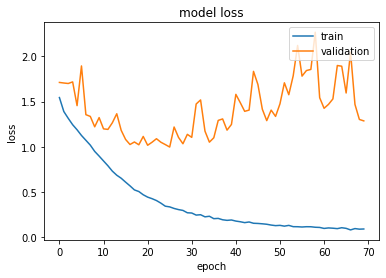

In [15]:
import matplotlib.pyplot as plt
#loss curve

print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

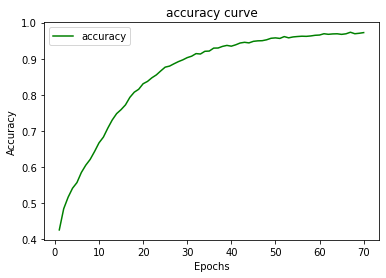

In [21]:
#accuracy curve
loss_train = history.history['accuracy']
epochs = range(1,71)
plt.plot(epochs, loss_train, 'g', label='accuracy')
plt.title('accuracy curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

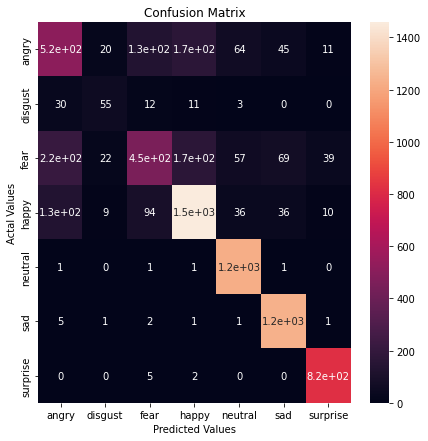

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd

prediction = model.predict(Test_features).argmax(axis=1)
cm = confusion_matrix(Test_lables, prediction)

cm_df = pd.DataFrame(cm,
                     index =  ["angry","disgust","fear","happy","neutral","sad","surprise"], 
                     columns =  ["angry","disgust","fear","happy","neutral","sad","surprise"])

plt.figure(figsize=(7,7))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()